# Projet professionnel - ONDO Finance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_excel(r"C:\Users\sebas\Desktop\DataSuits\Mudules Data Analyst\Module 6 - Projet final\PROJET PROFESSIONNEL\Ondo_data new_23_janvier.xlsx")

In [3]:
data.head()

,Index,Date Open,Date Close,Open en $,High en $,Low en $,Close en $,Volume en $,Volume précédent en $,Variation de volume en %,MarketCap en $,MarketCap précédent en $,Variation du market cap en %,Timestamp,Variation absolue du prix du token en $,Variation du prix du token en %,Tendance de prix,Ratio High/Low,Type de variation,Moyenne Volume en $
0,1,20/01/2025,21/01/2025,"1,36","1,49","1,28","1,29","719520137,1",889735065,-19.13,4088077141,4309274066,"-5,13",21/01/2025,"-0,07","-5,00",Baisse,"1,16",Faible,"215470132,1"
1,2,19/01/2025,20/01/2025,"1,3","1,55","1,28","1,36",889735065,"806412507,6",10.33,4309274066,4108471703,4.89,20/01/2025,"0,06",4,Hausse,"1,21",Moyenne,"215470132,1"
2,3,18/01/2025,19/01/2025,"1,31","1,48","1,18","1,3","806412507,6","288257037,4",179.75,4108471703,1820509701,125.68,19/01/2025,"-0,01","-1,00",Baisse,"1,25",Faible,"215470132,1"
3,4,17/01/2025,18/01/2025,"1,22","1,31","1,21","1,31","288257037,4",225931083,27.59,1820509701,1690407873,7.7,18/01/2025,"0,09",7,Hausse,"1,08",Moyenne,"215470132,1"
4,5,16/01/2025,17/01/2025,"1,29","1,3","1,2","1,22",225931083,"202399276,6",11.63,1690407873,1792579240,"-5,70",17/01/2025,"-0,07","-6,00",Baisse,"1,08",Faible,"215470132,1"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Index                                    364 non-null    int64 
 1   Date Open                                364 non-null    object
 2   Date Close                               364 non-null    object
 3   Open en $                                364 non-null    object
 4   High en $                                364 non-null    object
 5   Low en $                                 364 non-null    object
 6   Close en $                               364 non-null    object
 7   Volume en $                              364 non-null    object
 8   Volume précédent en $                    364 non-null    object
 9   Variation de volume en %                 364 non-null    object
 10  MarketCap en $                           364 non-null    objec

In [5]:
data.describe().round(1)

,Index
count,364.0
mean,182.5
std,105.2
min,1.0
25%,91.8
50%,182.5
75%,273.2
max,364.0


In [6]:
# Conversion en datetime
cols_to_convert_to_datetime = ["Date Open", "Date Close", "Timestamp"]
data[cols_to_convert_to_datetime] = data[cols_to_convert_to_datetime].apply(pd.to_datetime, errors='coerce')

C:\Users\sebas\AppData\Local\Temp\ipykernel_11160\669124482.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[cols_to_convert_to_datetime] = data[cols_to_convert_to_datetime].apply(pd.to_datetime, errors='coerce')
C:\Users\sebas\AppData\Local\Temp\ipykernel_11160\669124482.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[cols_to_convert_to_datetime] = data[cols_to_convert_to_datetime].apply(pd.to_datetime, errors='coerce')
C:\Users\sebas\AppData\Local\Temp\ipykernel_11160\669124482.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[cols_to_convert_to_datetime] = data[cols_to_convert_to_datetime].apply(pd.to_datetime, err

In [7]:
# Liste des colonnes à convertir
cols_to_convert_to_float = [
    "Open en $", "High en $", "Low en $", "Close en $", "Volume en $", 
    "Volume précédent en $", "Variation de volume en %", "MarketCap en $", 
    "MarketCap précédent en $", "Variation du market cap en %", 
    "Variation absolue du prix du token en $", "Variation du prix du token en %", 
    "Ratio High/Low", "Moyenne Volume en $"
]

# Remplacer les virgules par des points
for col in cols_to_convert_to_float:
    data[col] = data[col].astype(str).str.replace(',', '.')  # Remplace les virgules par des points

# Conversion en float
data[cols_to_convert_to_float] = data[cols_to_convert_to_float].apply(pd.to_numeric, errors='coerce')

# Vérifier les valeurs NaN après conversion
print(data.isnull().sum())


Index                                      0
Date Open                                  0
Date Close                                 0
Open en $                                  0
High en $                                  0
Low en $                                   0
Close en $                                 0
Volume en $                                0
Volume précédent en $                      0
Variation de volume en %                   0
MarketCap en $                             0
MarketCap précédent en $                   0
Variation du market cap en %               0
Timestamp                                  0
Variation absolue du prix du token en $    0
Variation du prix du token en %            0
Tendance de prix                           0
Ratio High/Low                             0
Type de variation                          0
Moyenne Volume en $                        0
dtype: int64


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Index                                    364 non-null    int64         
 1   Date Open                                364 non-null    datetime64[ns]
 2   Date Close                               364 non-null    datetime64[ns]
 3   Open en $                                364 non-null    float64       
 4   High en $                                364 non-null    float64       
 5   Low en $                                 364 non-null    float64       
 6   Close en $                               364 non-null    float64       
 7   Volume en $                              364 non-null    float64       
 8   Volume précédent en $                    364 non-null    float64       
 9   Variation de volume en %                 36

In [9]:
data.describe().round(1)

,Index,Date Open,Date Close,Open en $,High en $,Low en $,Close en $,Volume en $,Volume précédent en $,Variation de volume en %,MarketCap en $,MarketCap précédent en $,Variation du market cap en %,Timestamp,Variation absolue du prix du token en $,Variation du prix du token en %,Ratio High/Low,Moyenne Volume en $
count,364.0,364,364,364.0,364.0,364.0,364.0,3.640000e+02,3.640000e+02,364.0,3.640000e+02,3.640000e+02,364.0,364,364.0,364.0,364.0,364.0
mean,182.5,2024-07-22 11:20:26.373626368,2024-07-23 11:20:26.373626368,0.9,0.9,0.8,0.9,2.160226e+08,2.147450e+08,8.9,1.255594e+09,1.245278e+09,1.0,2024-07-23 11:20:26.373626368,0.0,0.3,1.1,215470132.1
min,1.0,2024-01-02 00:00:00,2024-01-02 00:00:00,0.2,0.2,0.2,0.2,3.015154e+07,3.015154e+07,-73.4,2.859717e+08,2.859717e+08,-14.5,2024-01-02 00:00:00,-0.2,-18.0,1.0,215470132.1
25%,91.8,2024-04-14 18:00:00,2024-04-15 18:00:00,0.7,0.7,0.6,0.7,1.068426e+08,1.068426e+08,-22.1,9.391837e+08,9.374791e+08,-3.5,2024-04-15 18:00:00,-0.0,-4.0,1.1,215470132.1
50%,182.5,2024-07-17 12:00:00,2024-07-18 12:00:00,0.8,0.8,0.8,0.8,1.645490e+08,1.645490e+08,-0.7,1.118823e+09,1.117843e+09,-0.3,2024-07-18 12:00:00,0.0,0.0,1.1,215470132.1
75%,273.2,2024-10-19 06:00:00,2024-10-20 06:00:00,1.1,1.2,1.1,1.1,2.819799e+08,2.774491e+08,24.1,1.548940e+09,1.539475e+09,4.5,2024-10-20 06:00:00,0.0,4.0,1.1,215470132.1
max,364.0,2025-12-01 00:00:00,2025-12-01 00:00:00,2.0,2.1,2.0,2.0,1.197299e+09,1.197299e+09,492.0,4.309274e+09,4.309274e+09,125.7,2025-12-01 00:00:00,0.2,23.0,1.4,215470132.1
std,105.2,NaN,NaN,0.4,0.4,0.4,0.4,1.646723e+08,1.625454e+08,52.4,5.853392e+08,5.681168e+08,9.1,NaN,0.1,6.1,0.1,0.0


In [10]:
data.head()

,Index,Date Open,Date Close,Open en $,High en $,Low en $,Close en $,Volume en $,Volume précédent en $,Variation de volume en %,MarketCap en $,MarketCap précédent en $,Variation du market cap en %,Timestamp,Variation absolue du prix du token en $,Variation du prix du token en %,Tendance de prix,Ratio High/Low,Type de variation,Moyenne Volume en $
0,1,2025-01-20,2025-01-21,1.36,1.49,1.28,1.29,719520137.1,889735065.0,-19.13,4.088077e+09,4.309274e+09,-5.13,2025-01-21,-0.07,-5.0,Baisse,1.16,Faible,215470132.1
1,2,2025-01-19,2025-01-20,1.30,1.55,1.28,1.36,889735065.0,806412507.6,10.33,4.309274e+09,4.108472e+09,4.89,2025-01-20,0.06,4.0,Hausse,1.21,Moyenne,215470132.1
2,3,2025-01-18,2025-01-19,1.31,1.48,1.18,1.30,806412507.6,288257037.4,179.75,4.108472e+09,1.820510e+09,125.68,2025-01-19,-0.01,-1.0,Baisse,1.25,Faible,215470132.1
3,4,2025-01-17,2025-01-18,1.22,1.31,1.21,1.31,288257037.4,225931083.0,27.59,1.820510e+09,1.690408e+09,7.70,2025-01-18,0.09,7.0,Hausse,1.08,Moyenne,215470132.1
4,5,2025-01-16,2025-01-17,1.29,1.30,1.20,1.22,225931083.0,202399276.6,11.63,1.690408e+09,1.792579e+09,-5.70,2025-01-17,-0.07,-6.0,Baisse,1.08,Faible,215470132.1


# Recherche de valeurs aberrantes grâce aux graphiques

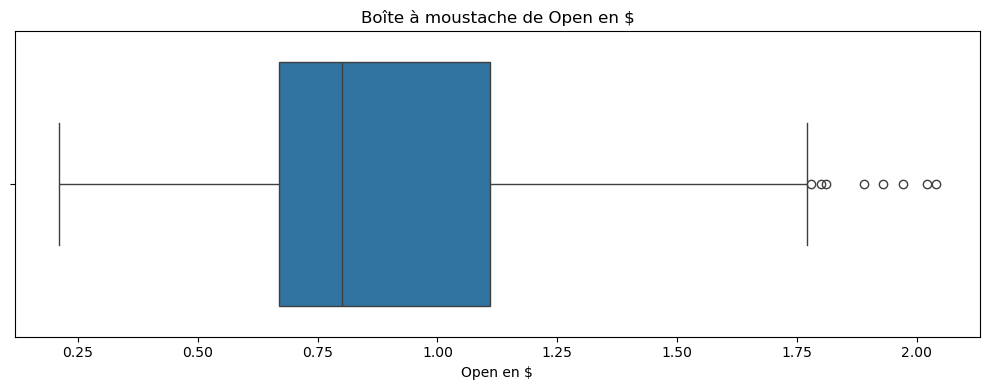

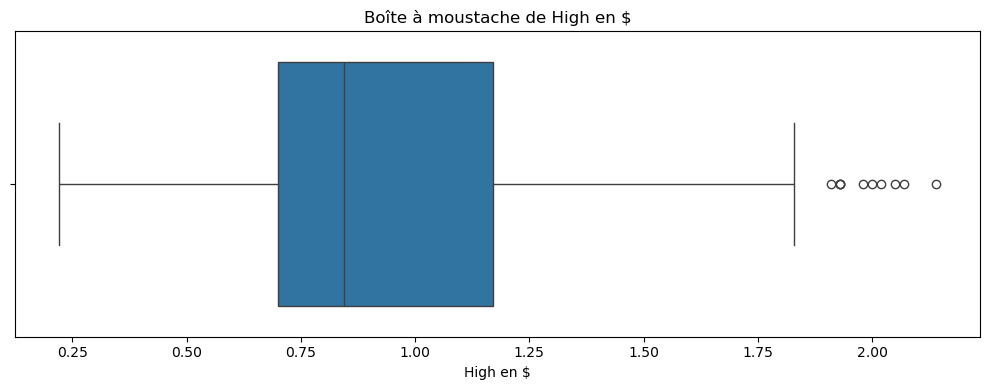

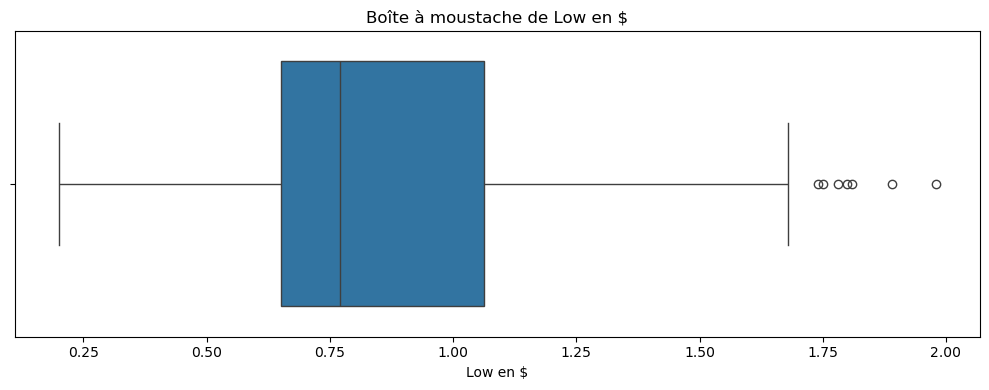

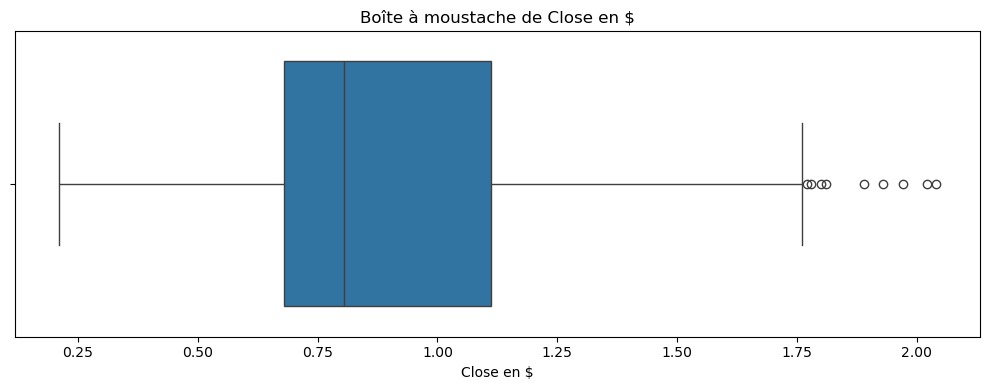

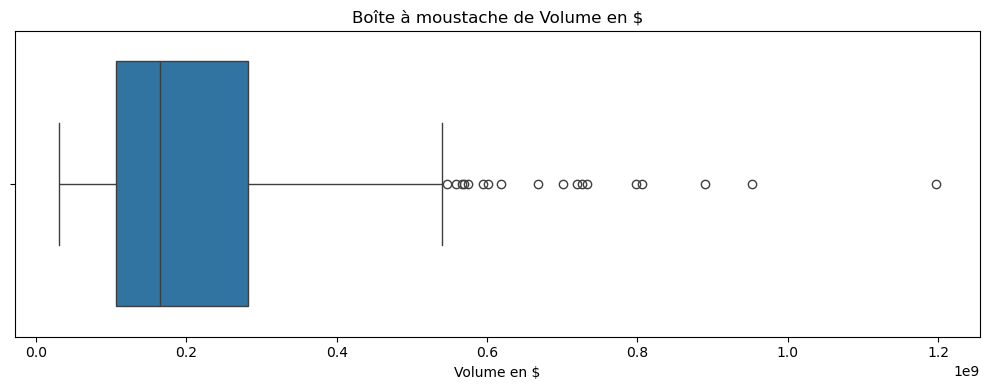

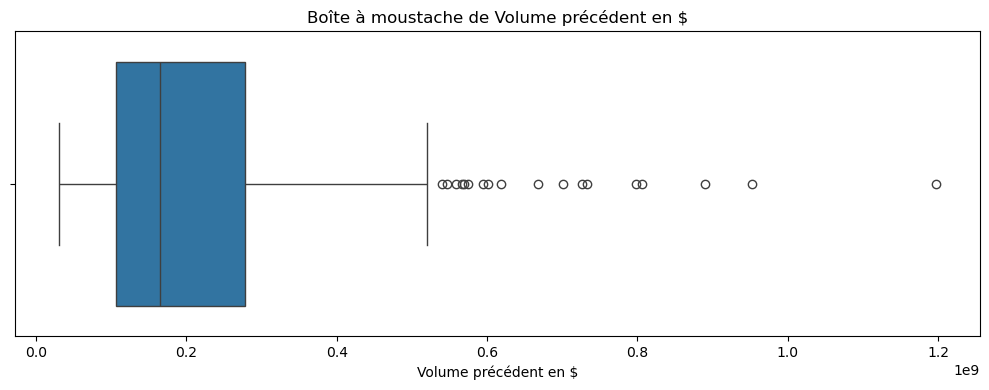

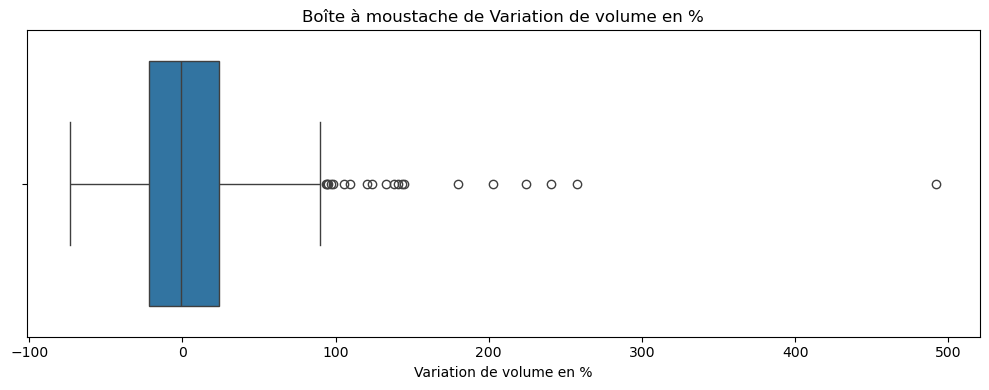

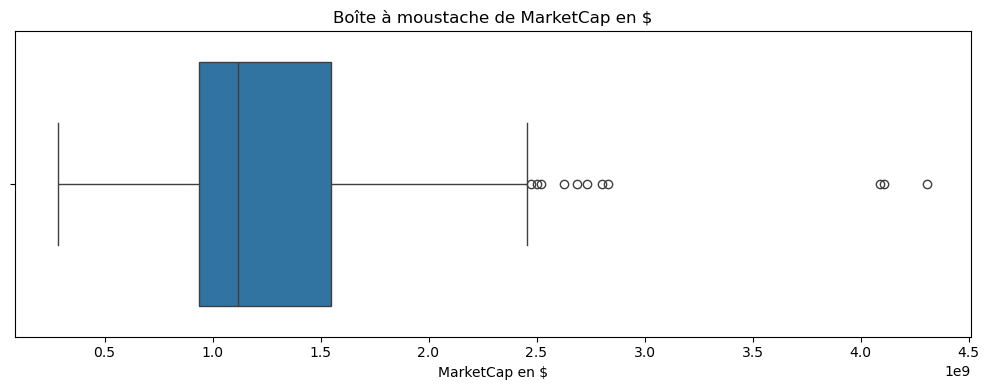

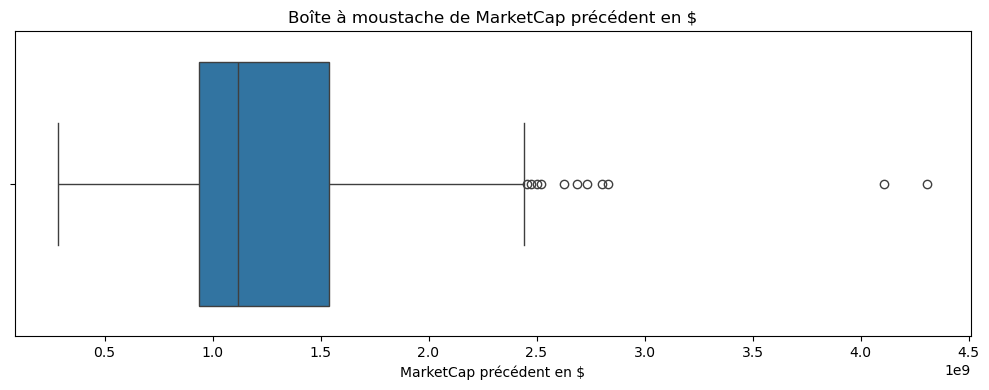

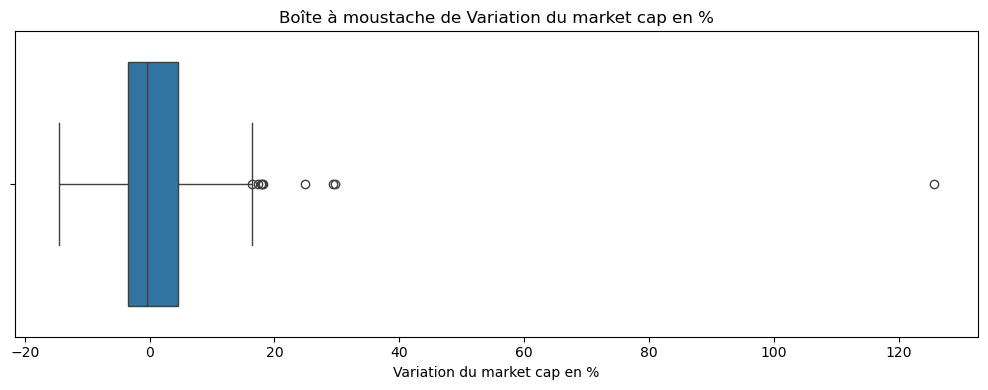

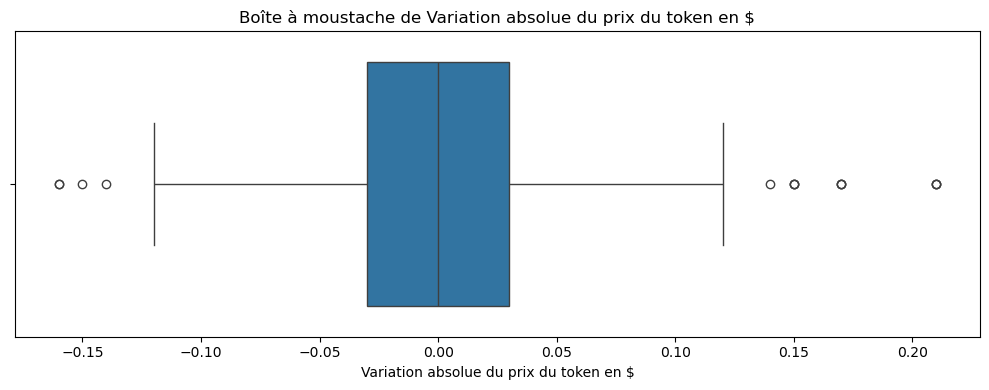

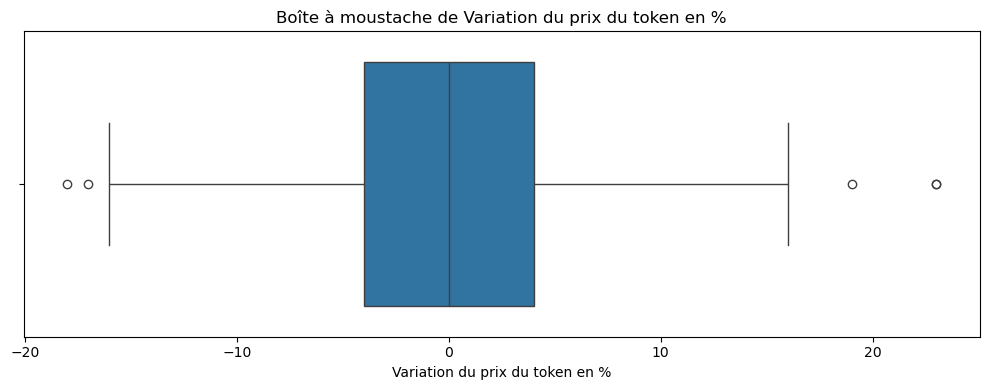

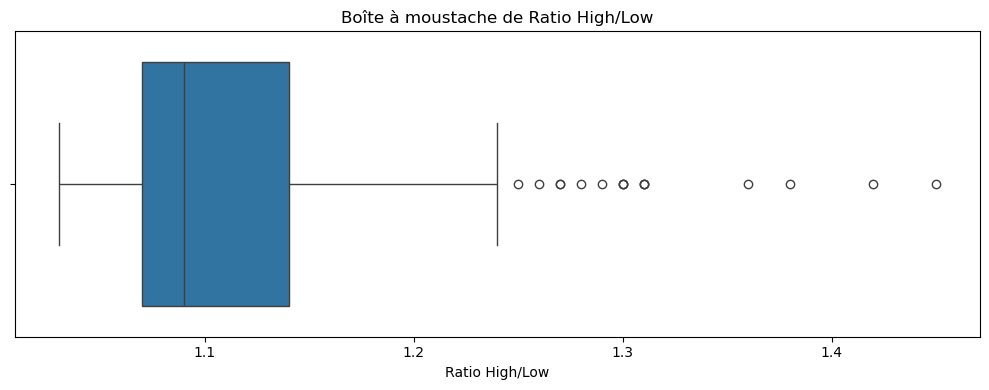

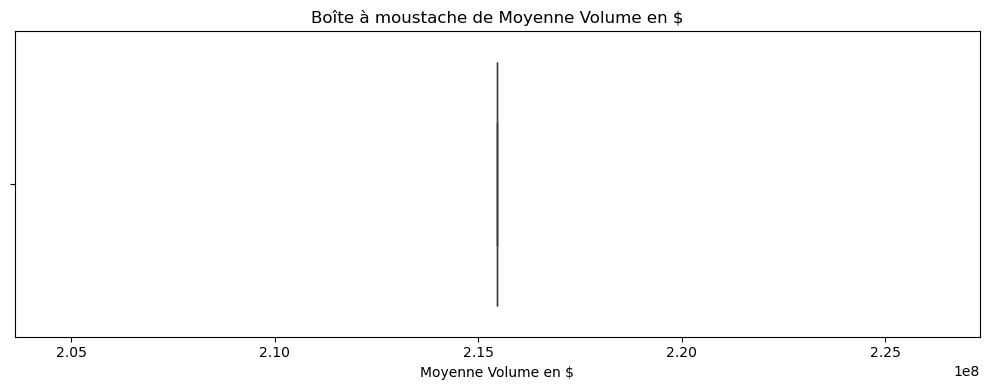

In [11]:
# Visualisation de la distribution de chaque variable quantitative
for col in data.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(10,4))

# Boîte à moustaches pour identifier les valeurs aberrantes
    plt.subplot()
    sns.boxplot(x=data[col])
    plt.title(f'Boîte à moustache de {col}')

    plt.tight_layout()
    plt.show()

## Visualisation des données - Nuage de points

In [12]:
#plt.figure(figsize=(10,6))
#plt.scatter(data["Volume"], data["Variation de prix en %"])
#plt.title("Variation des prix en fonction des volumes")
#plt.xlabel("Volume")
#plt.ylabel("Variation de prix en %")
#plt.show()

## Matrice de corrélation

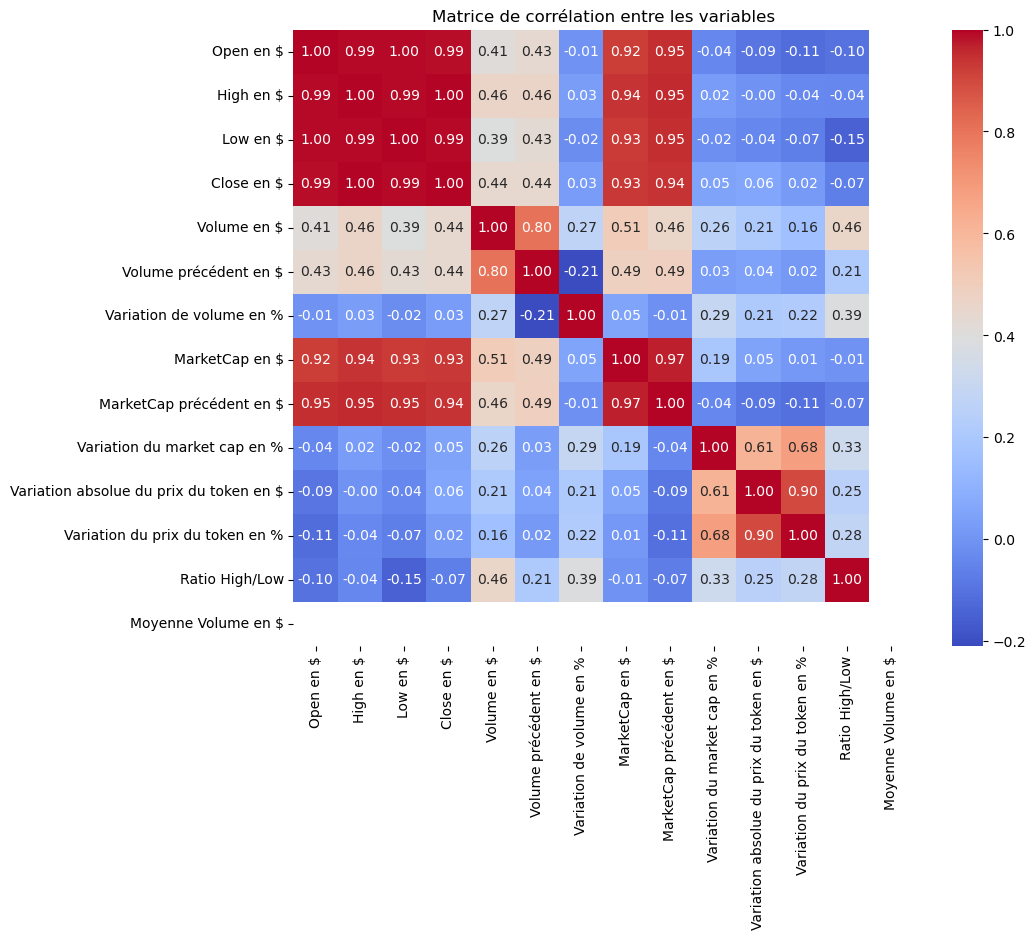

In [13]:
# Calcul de la matrice de corrélation
correlation = data[["Open en $", "High en $", "Low en $", "Close en $", "Volume en $", 
    "Volume précédent en $", "Variation de volume en %", "MarketCap en $", 
    "MarketCap précédent en $", "Variation du market cap en %", 
    "Variation absolue du prix du token en $", "Variation du prix du token en %", 
    "Ratio High/Low", "Moyenne Volume en $"]].corr()

# Création du heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre les variables")
plt.show()

# Modélisation et Analyse du Modèle

### Séparation des variables features et target // Création du modèle d'entrainement ---> target Close en $

In [14]:
# Séparation des variables indépendantes (X) et de la variable cible (y)
X_price = data.drop(columns=["Index","Open en $", "High en $", "Low en $","Close en $", "Volume précédent en $", "Variation de volume en %", "MarketCap en $", "MarketCap précédent en $", "Variation du market cap en %", "Variation absolue du prix du token en $", "Ratio High/Low","Moyenne Volume en $", "Timestamp", "Date Open", "Date Close", "Tendance de prix", "Type de variation"], axis=1)
y_price = data["Close en $"]

# Division de l'ensemble des données en un ensemble d'entraînement et un ensemble de test
X_price_train, X_price_test, y_price_train, y_price_test = train_test_split(X_price ,y_price ,test_size=0.2, random_state=42)

### Détermination des coefficients de correlation et de détermination pour la target Close en $


In [15]:
# Construction du modèle
model_price = LinearRegression()

# Entraînement du modèle avec l'ensemble d'entraînement
model_price.fit(X_price_train, y_price_train)

# Prédiction sur l'ensemble de test
y_price_pred = model_price.predict(X_price_test)

# Evaluation du modèle
mse = mean_squared_error(y_price_test,y_price_pred)
r2 = r2_score(y_price_test, y_price_pred)

print(f'Le MSE est de : {mse}')
print(f'Le R² score est de : {r2}')

Le MSE est de : 0.1396683669157522
Le R² score est de : 0.1725568484524188


### Performance du Modèle
- MSE (Mean Squared Error): La valeur du MSE est très bas (0.1396683669157522), ce qui suggère que les erreurs entre les valeurs prédites par le modèle et les valeurs réelles sont infimes.
- R² (Coefficient de détermination): Le R² est de 0.1725568484524188, ce qui indique que le modèle explique seulement 17% de la variance de la variable cible à partir des variables indépendantes, ce qui constitue un indice assez mauvais.

### Séparation des variables features et target // Création du modèle d'entrainement ---> target Volume en $

In [16]:
# Séparation des variables indépendantes (X) et de la variable cible (y)
X_volume = data.drop(columns=["Index", "Volume en $","Volume précédent en $","Open en $", "High en $", "Low en $","MarketCap en $","MarketCap précédent en $","Variation du market cap en %","Variation de volume en %", "Variation du prix du token en %", "Moyenne Volume en $", "Timestamp", "Date Open", "Date Close", "Tendance de prix", "Type de variation"], axis=1)
y_volume = data["Volume en $"]

# Division de l'ensemble des données en un ensemble d'entraînement et un ensemble de test
X_volume_train, X_volume_test, y_volume_train, y_volume_test = train_test_split(X_volume, y_volume, test_size=0.2, random_state=42)

### Détermination des coefficients de correlation et de détermination pour la target Volume en $

In [17]:
# Construction du modèle
model_volume = LinearRegression()

# Entraînement du modèle avec l'ensemble d'entraînement
model_volume.fit(X_volume_train, y_volume_train)

# Prédiction sur l'ensemble de test
y_volume_pred = model_volume.predict(X_volume_test)

# Evaluation du modèle
mse = mean_squared_error(y_volume_test, y_volume_pred)
r2 = r2_score(y_volume_test, y_volume_pred)

print(f'Le MSE est de : {mse}')
print(f'Le R² score est de {r2}')

Le MSE est de : 1.9779419025967964e+16
Le R² score est de 0.3376829759354337


### Performance du Modèle
- MSE (Mean Squared Error): La valeur de la MSE est extrêmement élevée (19 779 419 025 967 964), ce qui suggère que les erreurs entre les valeurs prédites par le modèle et les valeurs réelles sont EXTREMEMENT GRANDES.
- R² (Coefficient de détermination): Le R² est de 0.3376829759354337, ce qui indique que le modèle explique près de 34% de la variance de la variable cible à partir des variables indépendantes, ce qui constitue un indice moyen.

### Coefficients du modèle --> target Prix (Close) en $

In [18]:
# Affichage de l'intercept du modèle, c-à-d la constante du modèle ( la valeur du Prix Close en $ lorsque les features sont égales à 0)
print(f'Intercept:{model_price.intercept_}')

# Affichage des coefficients pour chaque variable indépendante
coefficients_price = pd.DataFrame(model_price.coef_,X_price.columns, columns=["Coefficient"])
print(coefficients_price)

Intercept:0.6748672264012636
                                  Coefficient
Volume en $                      9.966687e-10
Variation du prix du token en %  9.248635e-04


- L'intercept de 0.6748672264012636 correspond au montant du Token plancher, c'est-à-dire le prix du Token si toutes les features étaient à 0.
- Volume en dollar : l'augmentation d'1 dollar, entraînerait une hausse du prix de 0.0000000009966687 dollars.
- Variation du prix du token en % : l'augmentation d'1% entraînerait une augmentation du prix de 0.0009248635 dollars.

### Application du modèle

In [19]:
price_pred = [[2154000000,6]]

prediction = model_price.predict(price_pred)
print("La prédiction du prix (Close en $) est de :", prediction[0])

La prédiction du prix (Close en $) est de : 2.8272407181092296


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Coefficients du modèle --> target Volume en $

In [20]:
# Affichage de l'intercept du modèle, c-à-d la constante du modèle ( la valeur du Volume en $ lorsque les features sont égales à 0)
print(f'Intercept:{model_volume.intercept_}')

# Affichage des coefficients pour chaque variable indépendante
coefficients_volume = pd.DataFrame(model_volume.coef_,X_volume.columns, columns=["Coefficient"])
print(coefficients_volume)

Intercept:-1300892173.563119
                                          Coefficient
Close en $                               2.012866e+08
Variation absolue du prix du token en $  2.903746e+08
Ratio High/Low                           1.203517e+09


- L'intercept de -1300892173.563119 correspond au montant du volume plancher, c'est-à-dire le montant du volume si toutes les features étaient à 0.
- Close en dollar : l'augmentation d'1 dollar, entraînerait une augmentation du volume de 201 286 600 dollars.
- Variation absolue du prix du token en dollar : l'augmentation d'1 dollar entraînerait une augmentation du volume de 290 374 600 dollars.
- Ratio High/Low  : l'augmentation d'1 point entraînerait une augmentation du volume de 1 203 517 000 dollars.

### Application du modèle

In [21]:
volume_pred = [[20,1, 1]]

prediction = model_volume.predict(volume_pred)
print("La prédiction du volume est de:", prediction[0])

La prédiction du volume est de: 4218731241.1909065


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
